In [3]:
import pandas as pd
import glob

In [5]:
# Assuming all CSV files are in the same directory
file_pattern = '*.csv'
csv_files = glob.glob(file_pattern)

In [7]:
combined_data = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

In [9]:
columns_of_interest = ["Longitude", "Latitude", "H2 Demand (KG)", "Asset"]
combined_data = combined_data[columns_of_interest]

In [11]:
combined_data.to_csv('combined_data.csv', index=False)

In [13]:
df=pd.read_csv('combined_data.csv')

In [15]:
df.head(5)

,Longitude,Latitude,H2 Demand (KG),Asset
0,-84.428056,33.636667,49119656.25,Aviation
1,-97.038056,32.896944,40185624.11,Aviation
2,-104.673056,39.861667,38364545.09,Aviation
3,-87.904722,41.978611,35291485.71,Aviation
4,-118.408056,33.942500,31692066.96,Aviation


In [17]:
df.tail(5)

,Longitude,Latitude,H2 Demand (KG),Asset
65368,-103.8202,35.8579,1.241644e+04,Roadways
65369,-101.0604,41.5682,2.392824e+04,Roadways
65370,-97.7017,26.9285,8.837185e+04,Roadways
65371,-100.2558,33.6165,9.756522e+07,Roadways
65372,-103.5800,31.8493,3.039032e+04,Roadways


In [19]:
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Longitude             0
Latitude              0
H2 Demand (KG)    21238
Asset             21994
dtype: int64


In [21]:
df_clean = df.dropna()

In [23]:
missing_values = df_clean.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Longitude         0
Latitude          0
H2 Demand (KG)    0
Asset             0
dtype: int64


In [27]:
# Grouping by 'Asset' and summing 'H2 Demand (KG)'
df_consolidated = df_clean.groupby('Asset')['H2 Demand (KG)'].sum().reset_index()

# Optionally, you can sort by 'H2 Demand (KG)' descending if needed
df_consolidated = df_consolidated.sort_values(by='H2 Demand (KG)', ascending=False).reset_index(drop=True)

print(df_consolidated)

                Asset  H2 Demand (KG)
0            Roadways    2.184572e+11
1                 Gas    1.097705e+11
2                Coal    5.005020e+10
3            Refinery    2.512719e+10
4       Heat_Refinery    2.461478e+10
5         Heat_Cement    1.127082e+10
6          Heat_Steel    1.022031e+10
7             Ammonia    5.518046e+09
8            Aviation    4.810941e+09
9        Heat_Ammonia    3.881994e+09
10       Heat_Olefins    2.882842e+09
11           Methanol    2.640304e+09
12      Heat_Methanol    1.106360e+09
13  Heat_Chlor-alkali    8.383299e+08
14           Shipping    8.657937e+03


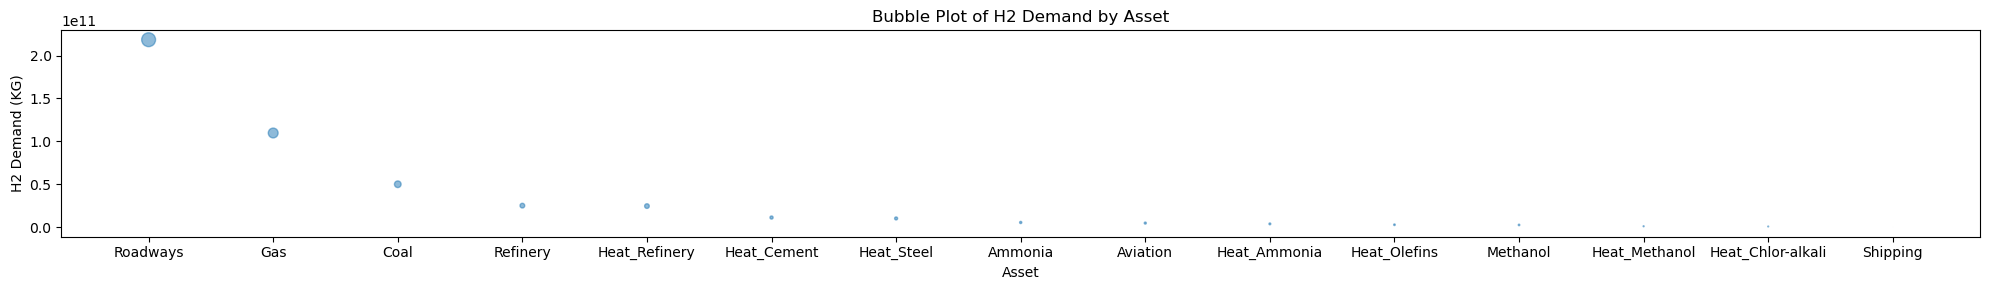

In [51]:
import matplotlib.pyplot as plt
x = df_consolidated['Asset']
y = df_consolidated['H2 Demand (KG)']
sizes = df_consolidated['H2 Demand (KG)'] / df_consolidated['H2 Demand (KG)'].max() * 100

# Creating the plot
plt.figure(figsize=(20,3))

# Scatter plot with bubble size based on H2 Demand (KG)
plt.scatter(x, y, s=sizes, alpha=0.5)

# Adding labels and title
plt.title('Bubble Plot of H2 Demand by Asset')
plt.xlabel('Asset')
plt.ylabel('H2 Demand (KG)')  # Putting H2 Demand (KG) on the y-axis

# Show plot
plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[['Latitude', 'Longitude', 'H2 Demand (KG)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Latitude', 'Longitude', 'H2 Demand (KG)'])

In [87]:
from sklearn.cluster import KMeans
# Apply K-means clustering
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
df_clean.loc[:, 'Cluster'] = kmeans.fit_predict(df_scaled[['Latitude', 'Longitude', 'H2 Demand (KG)']])

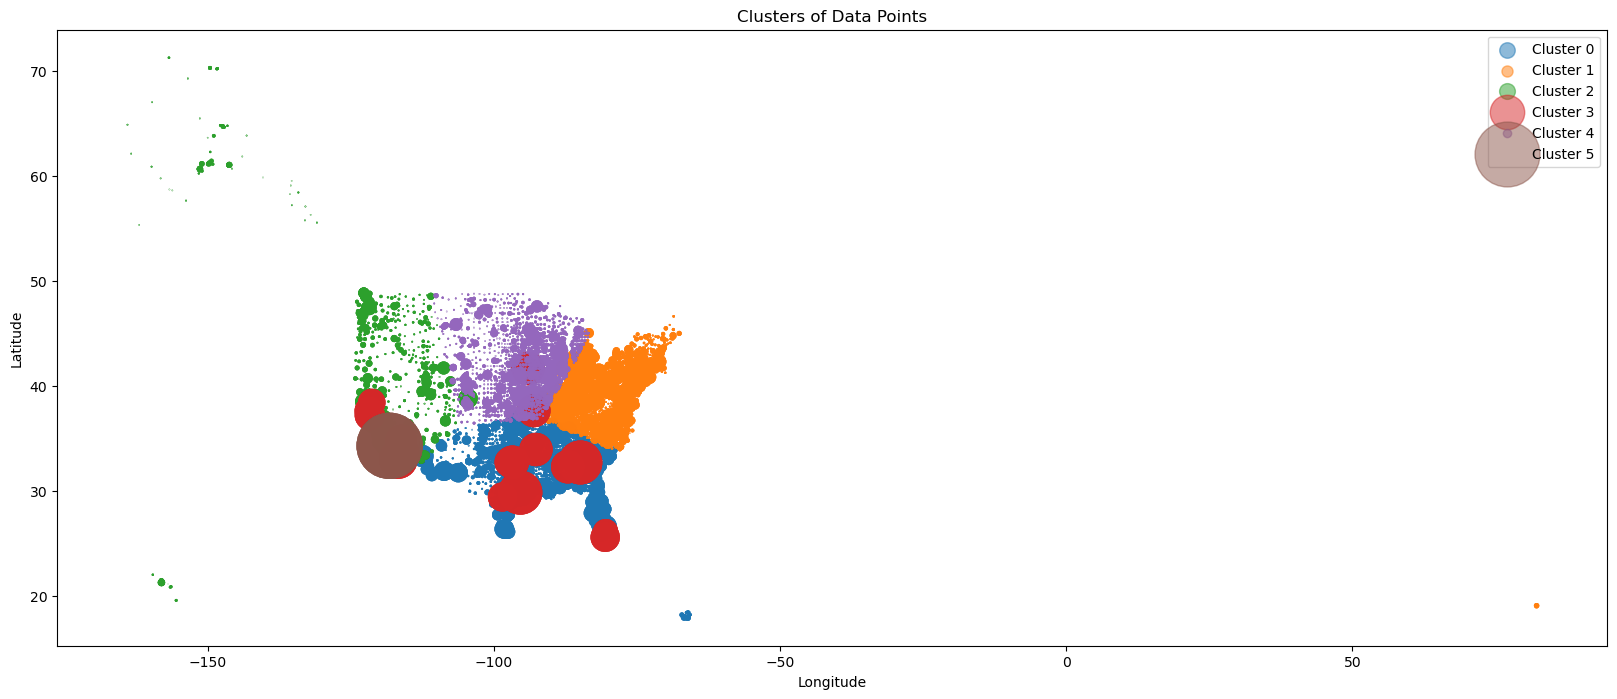

In [97]:
# Assuming df_clean and k are defined
plt.figure(figsize=(20, 8))

for cluster in range(k):
    cluster_data = df_clean.loc[df_clean['Cluster'] == cluster]
    
    # Adjusting marker size by dividing by a factor (e.g., 1e8)
    marker_size = cluster_data['H2 Demand (KG)'] / 1e6
    
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], s=marker_size, label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Data Points')
plt.legend()
plt.show()